# Capstone Dataset Analysis

In [1]:
# Necessary Imports
import pandas as pd
import numpy as np
import os

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Pandas profiling to make an automatic study of all variables, may need to manually allow it in Anaconda
# import pandas_profiling

# Web Scrapping 
import pandas as pd
import requests
import utils
from bs4 import BeautifulSoup

# Regular Expressions
import re

In [2]:
def read_data():
    data_pre_processed = pd.read_csv(os.path.join('data','data_preprocessed.csv'),parse_dates=True)
    
    data_pre_processed = data_pre_processed.drop(['Unnamed: 0'],axis=1)
    
    data_pre_processed['interventiondatetime'] = pd.to_datetime(data_pre_processed['interventiondatetime']) 
    
    return data_pre_processed

In [3]:
data_pre_processed = read_data()

In [8]:
dataset_size_before_removing_duplicates = len(data_pre_processed)
dataset_size_before_removing_duplicates

2268532

# Removing Duplicates

- For the exploratory data analysis it is important to remove all the duplicates, otherwise the results would not correspond to the reality 

In [9]:
data_pre_processed = data_pre_processed.drop_duplicates()

# Updtating Intervention Datetime to Timestamp

In [10]:
dataset_size_after_removing_duplicates = len(data_pre_processed)
dataset_size_after_removing_duplicates

2268532

In [11]:
round(((dataset_size_before_removing_duplicates - dataset_size_after_removing_duplicates)/dataset_size_before_removing_duplicates)*100,2)

0.0

#### Number of Unique Officers

In [12]:
len(data_pre_processed['reportingofficeridentificationid'].unique())

8434

#### Number of Searched Cars

In [9]:
round((len(data_pre_processed[data_pre_processed['vehiclesearchedindicator']==True])/len(data_pre_processed))*100,2)

3.08

#### Percentage of Contraband Found

In [10]:
round(((data_pre_processed['contrabandindicator']==True).sum()/len(data_pre_processed))*100,2)

1.13

# Socio Demographics

Text(0.5,1,'Main Subject Race Distribution')

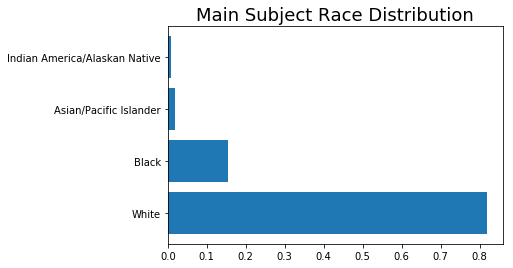

In [11]:
race = ['White','Black','Asian/Pacific Islander','Indian America/Alaskan Native']
percentages = (data_pre_processed['subjectracecode'].str.upper().value_counts()/len(data_pre_processed)).tolist()

ypos = np.arange(len(race))

plt.yticks(ypos,race)
plt.barh(ypos,percentages)
plt.title('Main Subject Race Distribution',fontsize=18)

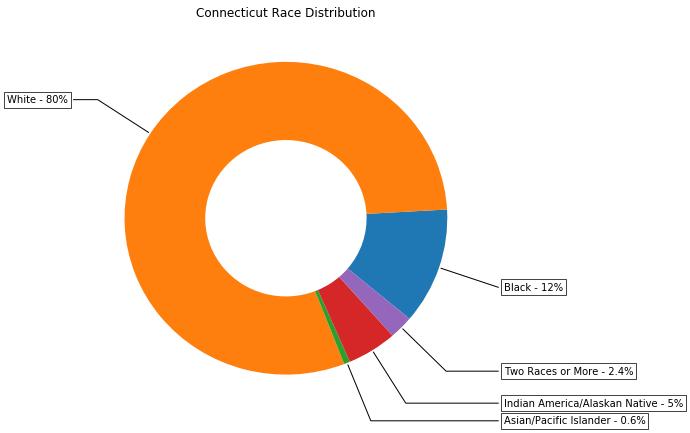

In [12]:
fig, ax = plt.subplots(figsize=(6, 6))

recipe = ['Black - 12%','White - 80%','Asian/Pacific Islander - 0.6%','Indian America/Alaskan Native - 5%','Two Races or More - 2.4%']
data = [12,80, 0.6, 5, 2.4]

wedges, texts = ax.pie(data, wedgeprops=dict(width=0.5), startangle=-40)

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(recipe[i], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                horizontalalignment=horizontalalignment, **kw)
plt.title('Connecticut Race Distribution')
plt.tight_layout()
plt.show()

#### Vehicle Stop by Subjectage & Subjectsexcode

In [13]:
round((data_pre_processed['subjectracecode'].value_counts()/len(data_pre_processed))*100,2)

w    81.83
b    15.43
a     1.96
i     0.78
Name: subjectracecode, dtype: float64

<Figure size 720x1440 with 0 Axes>

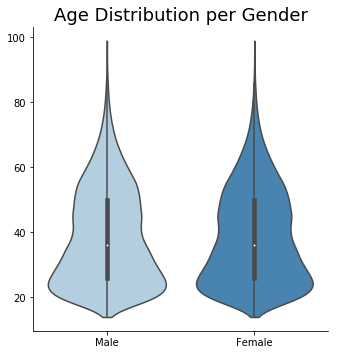

In [60]:
plt.figure(figsize=(10,20))
sns.catplot(y="subjectage",x="subjectsexcode",kind='violin',bw=.15, cut=0,data=data_pre_processed,
           palette="Blues")
plt.xticks(np.arange(2), ('Male', 'Female'))
plt.title('Age Distribution per Gender',fontsize=18)
plt.xlabel('')
plt.ylabel('')
plt.show()

#### Female Count

In [15]:
female_count = (data_pre_processed['subjectsexcode']=='f').sum()
female_count

833287

#### Male Count

In [16]:
male_count = (data_pre_processed['subjectsexcode']=='m').sum()
male_count

1435245

#### Gender Ratio

In [17]:
female_ratio = round((female_count/len(data_pre_processed))*100,2)
male_ratio = 100-female_ratio

print(female_ratio)
print(male_ratio)

36.73
63.27


#### Average Ages

In [53]:
overall_average_age = round(data_pre_processed['subjectage'].mean(),2)
female_average_age = round(data_pre_processed[data_pre_processed['subjectsexcode']=='f']['subjectage'].mean(),2)
male_average_age = round(data_pre_processed[data_pre_processed['subjectsexcode']=='m']['subjectage'].mean(),2)

In [54]:
print(overall_average_age)
print(female_average_age)
print(male_average_age)

38.65
38.72
38.61


#### Race Distribution 

In [56]:
for n in data_pre_processed['subjectracecode'].unique().tolist():
    print(round((len(data_pre_processed[data_pre_processed['subjectracecode']==n])/len(data_pre_processed))*100,2))

81.83
15.43
1.96
0.78


### Vehicle Stop Ethinicity by Gender

Text(0.5,1,'Other Metrics')

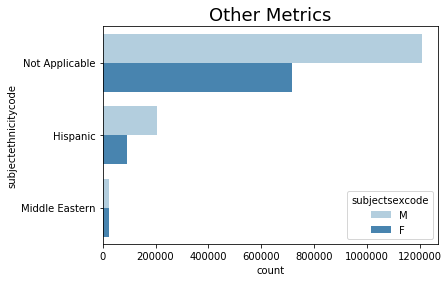

In [57]:
sns.countplot(y='subjectethnicitycode',data=data_pre_processed,hue=data_pre_processed['subjectsexcode'].str.upper()
              ,palette="Blues",order = data_pre_processed['subjectethnicitycode'].value_counts().index)
plt.yticks(np.arange(3), ('Not Applicable', 'Hispanic', 'Middle Eastern'))
plt.title('Other Metrics',fontsize=18)

### Vehicle Stop by Gender

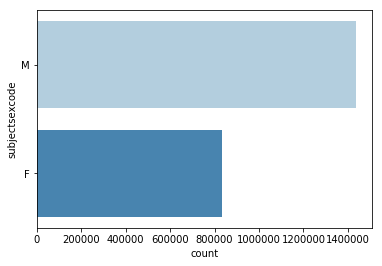

In [20]:
sns.countplot(y=data_pre_processed['subjectsexcode'].str.upper(),data=data_pre_processed,palette="Blues")

In [21]:
round((data_pre_processed['subjectsexcode'].value_counts()/len(data_pre_processed))*100,2)

m    63.27
f    36.73
Name: subjectsexcode, dtype: float64

### Vehicle Stop by Race

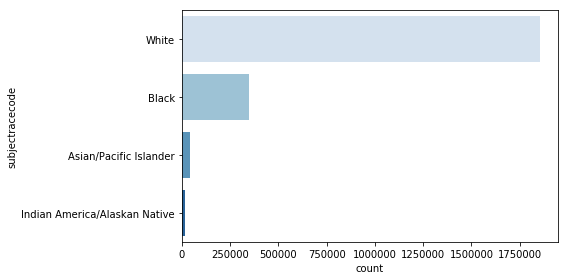

In [22]:
plt.figure(figsize=(8,4))
sns.countplot(y=data_pre_processed['subjectracecode'].str.upper(),data=data_pre_processed,palette="Blues")
plt.yticks(np.arange(4), ('White','Black','Asian/Pacific Islander','Indian America/Alaskan Native'))
plt.tight_layout()

### Vehicle Stop by Race & Gender

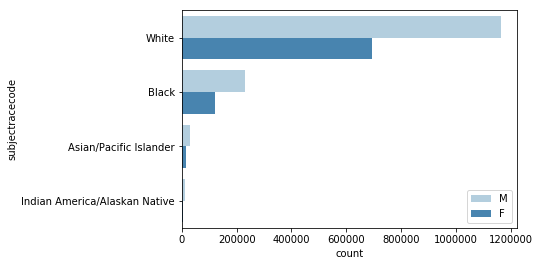

In [23]:
sns.countplot(y='subjectracecode',data=data_pre_processed,hue=data_pre_processed['subjectsexcode'].str.upper()
              ,palette="Blues",order = data_pre_processed['subjectracecode'].value_counts().index)
plt.yticks(np.arange(4), ('White','Black','Asian/Pacific Islander','Indian America/Alaskan Native'))
plt.legend(loc='lower right')

In [24]:
# pd.pivot_table(data_pre_processed, values='subjectage',index=['subjectethnicitycode',
#                                                                               'subjectracecode'],
#                aggfunc=len)
#.to_csv('data/subjectage.csv')
#.to_csv('data/contraband_per_race.csv')

### Vehicle Stop by Race and Ethinicity

([<matplotlib.axis.XTick at 0x1e83e4cadd8>,
 <a list of 3 Text xticklabel objects>)

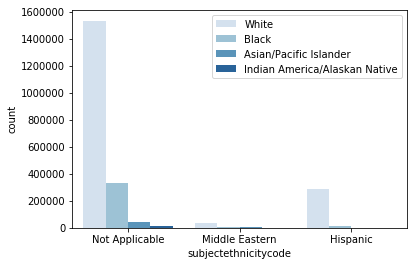

In [25]:
sns.countplot(data=data_pre_processed,
              x='subjectethnicitycode',palette="Blues",
              hue=data_pre_processed['subjectracecode'].str.upper())
plt.legend(['White','Black','Asian/Pacific Islander','Indian America/Alaskan Native'])
plt.xticks(np.arange(3), ('Not Applicable','Middle Eastern', 'Hispanic'))

# New Columns

In [26]:
data_pre_processed['year'] = data_pre_processed['interventiondatetime'].apply(lambda x: x.year)
data_pre_processed['month'] = data_pre_processed['interventiondatetime'].apply(lambda x: x.month)
data_pre_processed['month_day'] = data_pre_processed['interventiondatetime'].apply(lambda x: x.day)
# 0 it is Monday and 6 is Sunday
data_pre_processed['weekday'] = data_pre_processed['interventiondatetime'].apply(lambda x: x.dayofweek)
data_pre_processed['hour'] = data_pre_processed['interventiondatetime'].apply(lambda x: x.hour)

In [27]:
def day_segmentation(df):
    """
    """
    data = df.copy()
    
    data['segmented_day'] = data['interventiondatetime'].apply(lambda x: x.strftime('%r'))
    
    day_index = data[data['segmented_day'].apply(lambda x: 'AM' in x)].index.tolist()
    
    night_index = data[data['segmented_day'].apply(lambda x: 'PM' in x)].index.tolist()
    
    
    dawn_index = [n for n,d in data.loc[day_index,'hour']\
                  .isin(np.arange(1,7).tolist()).to_dict().items() if d == True]
    
    morning_index = [n for n,d in data.loc[day_index,'hour']\
                  .isin(np.arange(7,13).tolist()).to_dict().items() if d == True]
    
    afternoon_index = [n for n,d in data.loc[night_index,'hour']\
                  .isin(np.arange(1,7).tolist()).to_dict().items() if d == True]
    
    night_index = [n for n,d in data.loc[night_index,'hour']\
                  .isin(np.arange(7,13).tolist()).to_dict().items() if d == True]
    
    data.loc[dawn_index,'segmented_day'] = 'dawn'
    data.loc[morning_index,'segmented_day'] = 'morning'
    data.loc[afternoon_index,'segmented_day'] = 'afternoon'
    data.loc[night_index,'segmented_day'] = 'night'
    
    return data

In [179]:
def segmenting_age_structure(df):
    """
    """
    data = df.copy()
    
    data['structured_age'] = 'hello'
    
    teenager_index = data[data['subjectage']<=19].index.tolist()
    young_adult_index = data[(data['subjectage']>19)&(data['subjectage']<=40)].index.tolist()
    adult_index = data[(data['subjectage']>40)&(data['subjectage']<=65)].index.tolist()
    senior_index = data[data['subjectage']>65].index.tolist()
    
    data.loc[teenager_index,'structured_age'] = 'teenager'
    data.loc[young_adult_index,'structured_age'] = 'young adult'
    data.loc[adult_index,'structured_age'] = 'adult'
    data.loc[senior_index,'structured_age'] = 'senior'
    
    return data

In [180]:
data_pre_processed = segmenting_age_structure(data_pre_processed)

In [28]:
data_pre_processed = day_segmentation(data_pre_processed)

# What Departments are more active?

In [29]:
least_active_departments = data_pre_processed['department_name'].value_counts()[-47:].index.tolist()
most_active_departments = data_pre_processed['department_name'].value_counts()[:47].index.tolist()

In [30]:
round((len(data_pre_processed[
    (data_pre_processed['department_name'].isin(least_active_departments))&
    (data_pre_processed['contrabandindicator']==True)])/\
       len(data_pre_processed[data_pre_processed['contrabandindicator']==True]))*100,2)

11.64

In [31]:
round((len(data_pre_processed[
    (data_pre_processed['department_name'].isin(most_active_departments))&
    (data_pre_processed['contrabandindicator']==True)])/\
       len(data_pre_processed[data_pre_processed['contrabandindicator']==True]))*100,2)

66.85

# What Departments have higer and lower Sucess Rate?

In [32]:
searches_dictionary_departments =\
data_pre_processed[data_pre_processed['vehiclesearchedindicator']==True]['department_name'].value_counts().to_dict()

In [33]:
contraband_departments = data_pre_processed[(data_pre_processed['vehiclesearchedindicator']==True)&
                  (data_pre_processed['contrabandindicator']==True)]['department_name'].value_counts().to_dict()

In [34]:
def most_effectively_locations(searches_dict,contraband_dict):
    """
    """
    searches = searches_dict
    contraband = contraband_dict
    
    searches_locations = [n for n,d in searches.items()]
    contraband_locations = [n for n,d in contraband.items()]
    
    effectiveness_dictionary = {}
    
    for n in searches_locations:
        if n in contraband_locations:
            effectiveness_dictionary[n] = round((contraband[n]/searches[n])*100,2)
        else:
            effectiveness_dictionary[n] = 0
            
    effectiveness_dictionary = {k: v for k, v in sorted(effectiveness_dictionary.items(), key=lambda item: item[1],reverse=True)}
            
    return effectiveness_dictionary

In [35]:
data_pre_processed['department_name'].nunique()

120

Text(0.5,1,'Departments Search Success Rate Distribution')

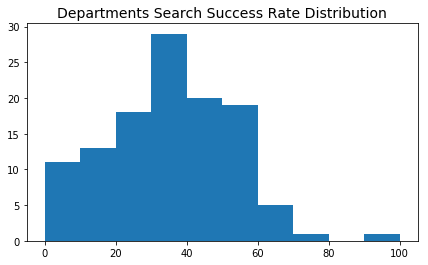

In [62]:
plt.figure(figsize=(7,4))
plt.hist(most_effectively_locations(searches_dictionary_departments,contraband_departments).values())
plt.title('Departments Search Success Rate Distribution',fontsize=14)

In [37]:
round(((np.array([n for n in most_effectively_locations(searches_dictionary_departments,contraband_departments).values()]) < 50)\
.sum()/len(most_effectively_locations(searches_dictionary_departments,contraband_departments).values()))*100,2)

77.78

# What internvention Locations are more and least active?

In [38]:
least_active_locations = data_pre_processed['interventionlocationname'].value_counts()[-47:].index.tolist()
most_active_locations = data_pre_processed['interventionlocationname'].value_counts()[:47].index.tolist()

In [39]:
round((len(data_pre_processed[
    (data_pre_processed['interventionlocationname'].isin(least_active_locations))&
    (data_pre_processed['contrabandindicator']==True)])/len(data_pre_processed[data_pre_processed['contrabandindicator']==True]))*100,2)

1.01

In [40]:
round((len(data_pre_processed[
    (data_pre_processed['interventionlocationname'].isin(most_active_locations))&
    (data_pre_processed['contrabandindicator']==True)])/len(data_pre_processed[data_pre_processed['contrabandindicator']==True]))*100,2)

70.97

- The most active locations have been responsible for more than 70% of all the contraband found. While the least active ones are only responsible for approximately for 1% of all contraband. This might indicate that the law enforcement resources have been well distributed. However, that is not possible to conclude, as we do not have data about thet contraband that has not been found

# What Intervention Locations have More and Less Contraband?

In [41]:
print('The top 25% spots with more contraband found represente approximatley '
      ,round((data_pre_processed[data_pre_processed['contrabandindicator']==True]['interventionlocationname']\
       .value_counts()[:47].sum()/len(data_pre_processed[(data_pre_processed['contrabandindicator']==True)]))*100,2)
      ,'% of all the contraband found')

The top 25% spots with more contraband found represente approximatley  77.03 % of all the contraband found


In [42]:
print('The bottom 25% spots with less contraband found represent approximatley '
      ,round((data_pre_processed[data_pre_processed['contrabandindicator']==True]['interventionlocationname']\
       .value_counts()[-47:].sum()/len(data_pre_processed[(data_pre_processed['contrabandindicator']==True)]))*100,2)
      ,'% of all the contraband found')

The bottom 25% spots with less contraband found represent approximatley  0.86 % of all the contraband found


# What Intervention Locations have higher and lower success rates?

In [43]:
searches_dictionary =\
data_pre_processed[data_pre_processed['vehiclesearchedindicator']==True]['interventionlocationname'].value_counts().to_dict()

In [44]:
contraband_locations = data_pre_processed[(data_pre_processed['vehiclesearchedindicator']==True)&
                  (data_pre_processed['contrabandindicator']==True)]['interventionlocationname'].value_counts().to_dict()

Text(0.5,1,'Intervention Locations Search Success Rate Distribution')

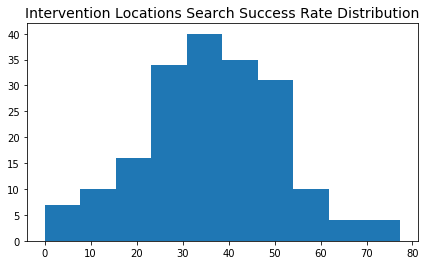

In [45]:
plt.figure(figsize=(7,4))
plt.hist(most_effectively_locations(searches_dictionary,contraband_locations).values())
plt.title('Intervention Locations Search Success Rate Distribution',fontsize= 14)

In [46]:
round(((np.array([n for n in most_effectively_locations(searches_dictionary,contraband_locations).values()]) < 50)\
.sum()/len(most_effectively_locations(searches_dictionary,contraband_locations).values()))*100,2)

79.58

# What are the Sucess Rates of Police Officers

In [47]:
searches_dictionary_officers =\
data_pre_processed[data_pre_processed['vehiclesearchedindicator']==True]['reportingofficeridentificationid'].value_counts().to_dict()

In [48]:
contraband_searches_officers = data_pre_processed[(data_pre_processed['vehiclesearchedindicator']==True)&
                  (data_pre_processed['contrabandindicator']==True)]['reportingofficeridentificationid'].value_counts().to_dict()

(array([1712.,  368.,  515.,  543.,  335.,  543.,  265.,  100.,   48.,
         458.]),
 array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.]),
 <a list of 10 Patch objects>)

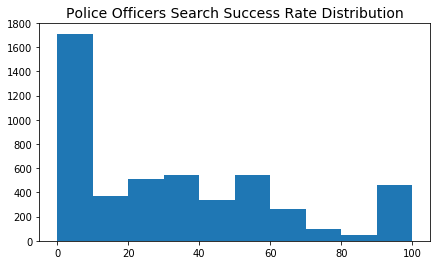

In [63]:
plt.figure(figsize=(7,4))
plt.title('Police Officers Search Success Rate Distribution',fontsize= 14)
plt.hist(most_effectively_locations(searches_dictionary_officers,contraband_searches_officers).values())

In [79]:
round(((np.array([n for n in most_effectively_locations(searches_dictionary_officers,contraband_searches_officers).values()])==0).sum()/data_pre_processed['reportingofficeridentificationid'].nunique())*100,2)

18.65

In [80]:
100-round(((np.array([n for n in most_effectively_locations(searches_dictionary_officers,contraband_searches_officers).values()])<50).sum()/data_pre_processed['reportingofficeridentificationid'].nunique())*100,2)

58.82

# What % of the police Work Force is making arrest on races with execption of the white one

# What were the main reasons for pulling over/ search a car?

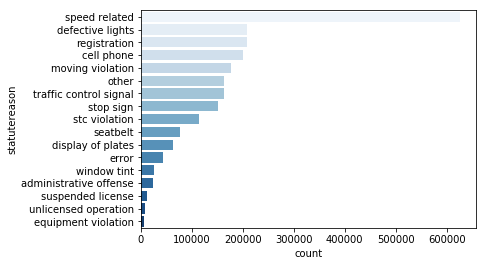

In [50]:
sns.countplot(data=data_pre_processed,y='statutereason',palette="Blues",
             order = data_pre_processed['statutereason'].value_counts().index)

# Are residents more likely to do contraband?

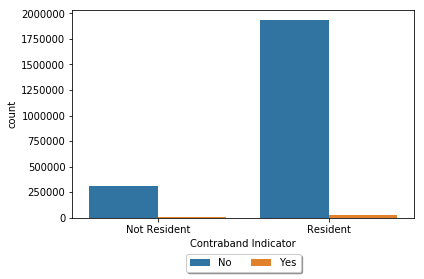

In [51]:
sns.countplot(data=data_pre_processed,x='residentindicator',hue='contrabandindicator')
plt.xticks(np.arange(2), ('Not Resident','Resident'))
plt.legend(['No','Yes'],
            loc='upper center', bbox_to_anchor=(0.5, -0.15),
          fancybox=True, shadow=True, ncol=5)
plt.xlabel('Contraband Indicator')
plt.tight_layout()

In [86]:
resident_contraband_percentage =\
len(data_pre_processed[(data_pre_processed['residentindicator']==True)&(data_pre_processed['contrabandindicator']==True)])\
/len(data_pre_processed)

not_resident_contraband_percentage =\
len(data_pre_processed[(data_pre_processed['residentindicator']==False)&(data_pre_processed['contrabandindicator']==True)])\
/len(data_pre_processed)

In [88]:
resident_contraband_percentage/not_resident_contraband_percentage

9.952157197778728

In [89]:
resident_contraband_percentage == 9.952157197778728*not_resident_contraband_percentage

True

# Pulling Cars Over Trend per Month

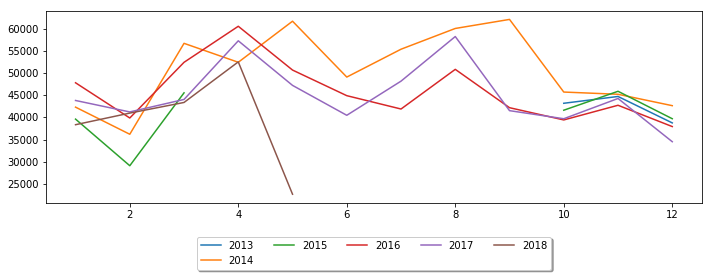

In [135]:
plt.figure(figsize=(10,4))
plt.plot(pd.pivot_table(data_pre_processed, columns='year',
                       index='month',values='contrabandindicator',
                       aggfunc=len))
plt.legend(data_pre_processed['year'].unique().tolist(),
            loc='upper center', bbox_to_anchor=(0.5, -0.15),
          fancybox=True, shadow=True, ncol=5)
plt.tight_layout()
plt.show()

In [137]:
len(data_pre_processed[(data_pre_processed['year']==2018)&(data_pre_processed['month']==1)])

38360

# How are the operations distributed by Year?

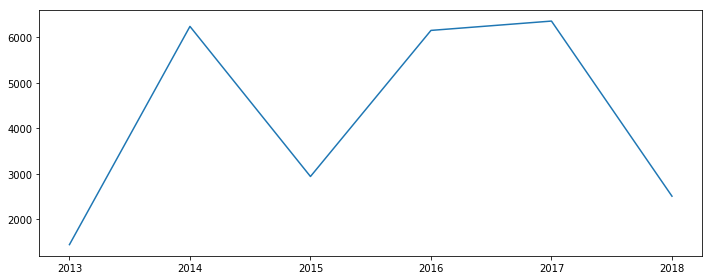

In [130]:
plt.figure(figsize=(10,4))
plt.plot(pd.pivot_table(data_pre_processed,
                       index='year',values='contrabandindicator',
                       aggfunc=np.sum))
# plt.legend(data_pre_processed['year'].unique().tolist(),
#             loc='upper center', bbox_to_anchor=(0.5, -0.1),
#           fancybox=True, shadow=True, ncol=5)
plt.tight_layout()
plt.show()

In [145]:
round(((len(data_pre_processed[(data_pre_processed['year']==2017)&(data_pre_processed['contrabandindicator']==True)])-\
len(data_pre_processed[(data_pre_processed['year']==2016)&(data_pre_processed['contrabandindicator']==True)]))/\
len(data_pre_processed[(data_pre_processed['year']==2016)&(data_pre_processed['contrabandindicator']==True)]))*100,2)

3.33

# How are the operations distributed throughout the day?

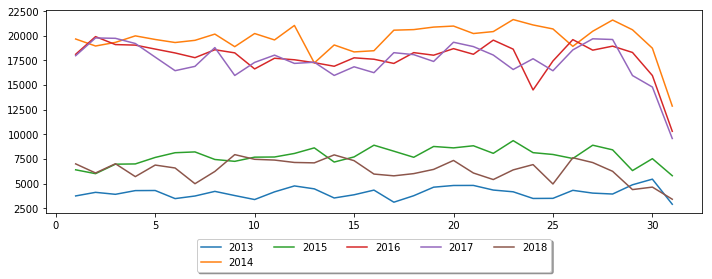

In [136]:
plt.figure(figsize=(10,4))
plt.plot(pd.pivot_table(data_pre_processed, columns='year',
                       index='month_day',values='contrabandindicator',
                       aggfunc=len))
plt.legend(data_pre_processed['year'].unique().tolist(),
            loc='upper center', bbox_to_anchor=(0.5, -0.1),
          fancybox=True, shadow=True, ncol=5)
plt.tight_layout()
plt.show()

# How are the operations distributed throughout the Weekday?

- **0 it is Monday and 6 is Sunday.**

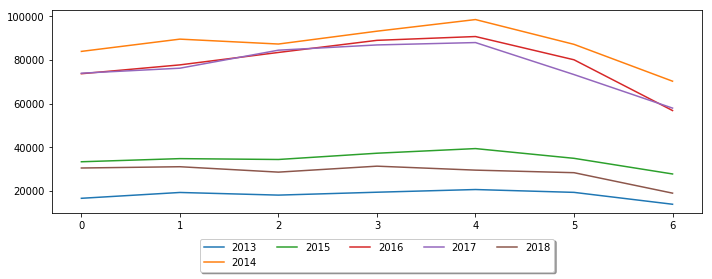

In [93]:
plt.figure(figsize=(10,4))
plt.plot(pd.pivot_table(data_pre_processed, columns='year',
                       index='weekday',values='subjectage',
                       aggfunc=len))
plt.legend(data_pre_processed['year'].unique().tolist(),
            loc='upper center', bbox_to_anchor=(0.5, -0.1),
          fancybox=True, shadow=True, ncol=5)
plt.tight_layout()
plt.show()

# How is the Contraband distributed throughout the Week?

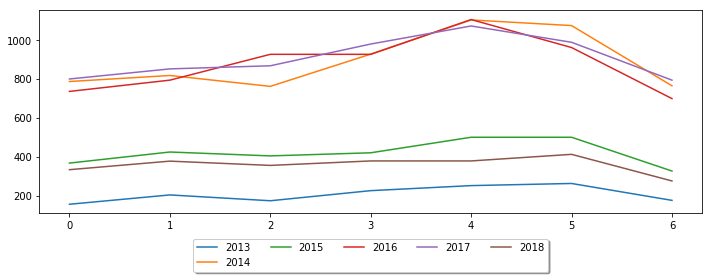

In [94]:
plt.figure(figsize=(10,4))
plt.plot(pd.pivot_table(data_pre_processed, columns='year',
                       index='weekday',values='contrabandindicator',
                       aggfunc=np.sum))
plt.legend(data_pre_processed['year'].unique().tolist(),
            loc='upper center', bbox_to_anchor=(0.5, -0.1),
          fancybox=True, shadow=True, ncol=5)
plt.tight_layout()
plt.show()

# How is contraband Distributed Throughout the Day?

- In this case we are going to divide the day in periods of six hours

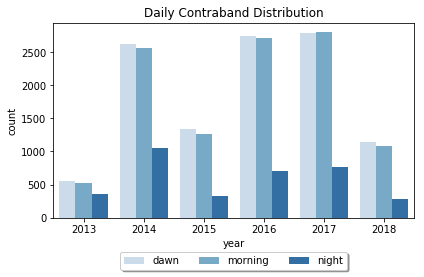

In [147]:
sns.countplot(data=data_pre_processed[data_pre_processed['contrabandindicator']==True]
                       ,x='year',hue='segmented_day',palette="Blues")
plt.legend(data_pre_processed['segmented_day'].unique().tolist(),
            loc='upper center', bbox_to_anchor=(0.5, -0.15),
          fancybox=True, shadow=True, ncol=5)
plt.title('Daily Contraband Distribution')
plt.tight_layout()

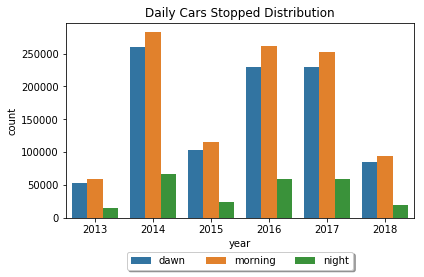

In [96]:
sns.countplot(data=data_pre_processed
                       ,x='year',hue='segmented_day')
plt.legend(data_pre_processed['segmented_day'].unique().tolist(),
            loc='upper center', bbox_to_anchor=(0.5, -0.15),
          fancybox=True, shadow=True, ncol=5)
plt.title('Daily Cars Stopped Distribution')
plt.tight_layout()

# How is contraband Distributed Daly and per month?

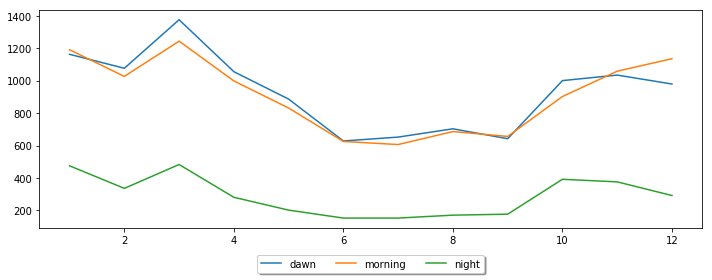

In [97]:
plt.figure(figsize=(10,4))
plt.plot(pd.pivot_table(data_pre_processed, columns='segmented_day',
                       index=['month'],values='contrabandindicator',
                       aggfunc=np.sum))
plt.legend(data_pre_processed['segmented_day'].unique().tolist(),
            loc='upper center', bbox_to_anchor=(0.5, -0.1),
          fancybox=True, shadow=True, ncol=5)
plt.tight_layout()
plt.show()

# Search And Stop Operations Details

In [156]:
print('Cars Stopped: ',len(data_pre_processed))
print('Cars Searched: ',len(data_pre_processed[data_pre_processed['vehiclesearchedindicator']==True]))
print('Contraband Found: ',len(data_pre_processed[data_pre_processed['contrabandindicator']==True]))

Cars Stopped:  2268532
Cars Searched:  69861
Contraband Found:  25639


In [162]:
def likelihood_output(variable,df):
    """
    """
    data = df.copy()
    
    unique_values = data[variable].unique().tolist()
    
    cars_stopped = data
    cars_searched = data[data['vehiclesearchedindicator']==True]
    contraband = data[data['contrabandindicator']==True]
    
    for n in unique_values:
        print(n, 'cars_stopped', len(cars_stopped[cars_stopped[variable]==n]))
        print(n, 'cars_searched', len(cars_searched[cars_searched[variable]==n]))
        print(n, 'contraband', len(contraband[contraband[variable]==n]))
        print('\n')
        print(len(cars_stopped[cars_stopped[variable]==n]))
        print(len(cars_searched[cars_searched[variable]==n]))
        print(len(contraband[contraband[variable]==n]))
        print('\n')

In [177]:
checking_likelihood = ['residentindicator', 'searchauthorizationcode', 'statutereason',
        'subjectethnicitycode', 'subjectracecode',
       'subjectsexcode', 'townresidentindicator','structured_age']

In [181]:
for n in checking_likelihood:
    likelihood_output(n,data_pre_processed)

True cars_stopped 1955040
True cars_searched 63876
True contraband 23298


1955040
63876
23298


False cars_stopped 313492
False cars_searched 5985
False contraband 2341


313492
5985
2341


n cars_stopped 2186641
n cars_searched 3116
n contraband 2949


2186641
3116
2949


o cars_stopped 42120
o cars_searched 27543
o contraband 14697


42120
27543
14697


i cars_stopped 14475
i cars_searched 14167
i contraband 1693


14475
14167
1693


c cars_stopped 25296
c cars_searched 25035
c contraband 6300


25296
25035
6300


speed related cars_stopped 625483
speed related cars_searched 7582
speed related contraband 3022


625483
7582
3022


window tint cars_stopped 25284
window tint cars_searched 3036
window tint contraband 1033


25284
3036
1033


display of plates cars_stopped 62380
display of plates cars_searched 5316
display of plates contraband 1878


62380
5316
1878


other cars_stopped 164138
other cars_searched 10210
other contraband 4458


164138
10210
4458


defective lights cars_sto

# Patterns in Vehicles Stopped

In [98]:
{n:round((d/len(data_pre_processed))*100,2) for n,d in data_pre_processed['subjectsexcode'].value_counts().to_dict().items()}

{'m': 63.27, 'f': 36.73}

In [99]:
{n:round((d/len(data_pre_processed))*100,2) for n,d in data_pre_processed['subjectethnicitycode'].value_counts().to_dict().items()}

{'n': 84.89, 'h': 13.12, 'm': 2.0}

In [100]:
{n:round((d/len(data_pre_processed))*100,2) for n,d in data_pre_processed['subjectracecode'].value_counts().to_dict().items()}

{'w': 81.83, 'b': 15.43, 'a': 1.96, 'i': 0.78}

# Patterns in Vehicles Stopped by Gender

In [101]:
data_pre_processed_female = data_pre_processed[data_pre_processed['subjectsexcode']=='f']
data_pre_processed_male = data_pre_processed[data_pre_processed['subjectsexcode']=='m']

#### Female

In [102]:
{n:round((d/len(data_pre_processed_female))*100,2) for n,d in data_pre_processed_female['subjectethnicitycode'].value_counts().to_dict().items()}

{'n': 86.18, 'h': 11.12, 'm': 2.7}

In [103]:
{n:round((d/len(data_pre_processed_female))*100,2) for n,d in data_pre_processed_female['subjectracecode'].value_counts().to_dict().items()}

{'w': 83.22, 'b': 14.4, 'a': 1.87, 'i': 0.51}

#### Male

In [104]:
{n:round((d/len(data_pre_processed_male))*100,2) for n,d in data_pre_processed_male['subjectethnicitycode'].value_counts().to_dict().items()}

{'n': 84.14, 'h': 14.28, 'm': 1.59}

In [105]:
{n:round((d/len(data_pre_processed_male))*100,2) for n,d in data_pre_processed_male['subjectracecode'].value_counts().to_dict().items()}

{'w': 81.03, 'b': 16.03, 'a': 2.01, 'i': 0.93}

# Patterns in Vehicles Searched

In [106]:
data_pre_processed_Vehicles_searched = data_pre_processed[data_pre_processed['vehiclesearchedindicator']==True]

In [107]:
{n:round((d/len(data_pre_processed_Vehicles_searched))*100,2) for n,d in data_pre_processed_Vehicles_searched['subjectsexcode'].value_counts().to_dict().items()}

{'m': 81.76, 'f': 18.24}

In [108]:
{n:round((d/len(data_pre_processed_Vehicles_searched))*100,2) for n,d in data_pre_processed_Vehicles_searched['subjectethnicitycode'].value_counts().to_dict().items()}

{'n': 76.11, 'h': 22.65, 'm': 1.24}

In [109]:
{n:round((d/len(data_pre_processed_Vehicles_searched))*100,2) for n,d in data_pre_processed_Vehicles_searched['subjectracecode'].value_counts().to_dict().items()}

{'w': 70.07, 'b': 29.0, 'a': 0.66, 'i': 0.27}

# Patterns in Vehicles Searched By Gender

In [110]:
data_pre_processed_Vehicles_female_searched = \
data_pre_processed_Vehicles_searched[data_pre_processed_Vehicles_searched['subjectsexcode']=='f']

data_pre_processed_Vehicles_male_searched = \
data_pre_processed_Vehicles_searched[data_pre_processed_Vehicles_searched['subjectsexcode']=='m']

#### Female

In [111]:
{n:round((d/len(data_pre_processed_Vehicles_female_searched))*100,2) \
 for n,d in data_pre_processed_Vehicles_female_searched['subjectethnicitycode'].value_counts().to_dict().items()}

{'n': 80.32, 'h': 18.26, 'm': 1.43}

In [112]:
{n:round((d/len(data_pre_processed_Vehicles_female_searched))*100,2) \
 for n,d in data_pre_processed_Vehicles_female_searched['subjectracecode'].value_counts().to_dict().items()}

{'w': 77.26, 'b': 21.8, 'a': 0.74, 'i': 0.2}

#### Male

In [113]:
{n:round((d/len(data_pre_processed_Vehicles_male_searched))*100,2) \
 for n,d in data_pre_processed_Vehicles_male_searched['subjectethnicitycode'].value_counts().to_dict().items()}

{'n': 75.18, 'h': 23.63, 'm': 1.2}

In [114]:
{n:round((d/len(data_pre_processed_Vehicles_male_searched))*100,2) \
 for n,d in data_pre_processed_Vehicles_male_searched['subjectracecode'].value_counts().to_dict().items()}

{'w': 68.47, 'b': 30.6, 'a': 0.64, 'i': 0.29}

# Patterns in Vehicle Searched / Vehicles Stopped

In [115]:
gender_before = data_pre_processed['subjectsexcode'].value_counts().to_dict()
gender_after = data_pre_processed_Vehicles_searched['subjectsexcode'].value_counts().to_dict()

In [116]:
{n:round((d/gender_before[n])*100,2) for n,d in gender_after.items()}

{'m': 3.98, 'f': 1.53}

### Race

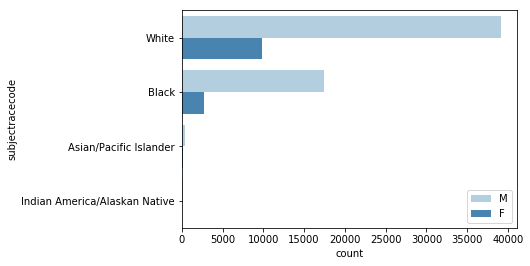

In [117]:
sns.countplot(y='subjectracecode',data=data_pre_processed_Vehicles_searched,
              hue=data_pre_processed_Vehicles_searched['subjectsexcode'].str.upper()
              ,palette="Blues",order = data_pre_processed_Vehicles_searched['subjectracecode'].value_counts().index)
plt.yticks(np.arange(4), ('White','Black','Asian/Pacific Islander','Indian America/Alaskan Native'))
plt.legend(loc='lower right')

In [118]:
race_before = data_pre_processed['subjectracecode'].value_counts().to_dict()
race_after = data_pre_processed_Vehicles_searched['subjectracecode'].value_counts().to_dict()

In [119]:
{n:round((d/race_before[n])*100,2) for n,d in race_after.items()}

{'w': 2.64, 'b': 5.79, 'a': 1.04, 'i': 1.08}

### Ethinicity 

([<matplotlib.axis.YTick at 0x1e830931b38>,
 <a list of 3 Text yticklabel objects>)

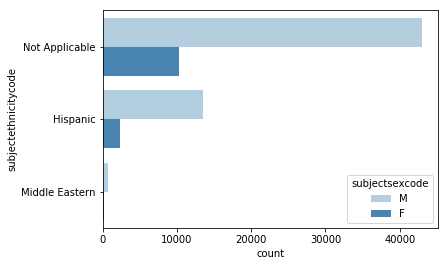

In [120]:
sns.countplot(y='subjectethnicitycode',data=data_pre_processed_Vehicles_searched,
              hue=data_pre_processed_Vehicles_searched['subjectsexcode'].str.upper()
              ,palette="Blues",order = data_pre_processed_Vehicles_searched['subjectethnicitycode'].value_counts().index)
plt.yticks(np.arange(3), ('Not Applicable', 'Hispanic', 'Middle Eastern'))

In [121]:
ethnicity_before = data_pre_processed['subjectethnicitycode'].value_counts().to_dict()
ethnicity_after = data_pre_processed_Vehicles_searched['subjectethnicitycode'].value_counts().to_dict()

In [122]:
{n:round((d/ethnicity_before[n])*100,2) for n,d in ethnicity_after.items()}

{'n': 2.76, 'h': 5.32, 'm': 1.91}

#### there are signs of racism

# Patterns in Vehicle Stopped & Searched with Contraband 

In [123]:
data_pre_processed_Vehicles_contraband = data_pre_processed_Vehicles_searched[data_pre_processed_Vehicles_searched\
                                                                              ['contrabandindicator']==True]

In [124]:
gender_before_contraband = data_pre_processed['subjectsexcode'].value_counts().to_dict()
gender_after_contraband = data_pre_processed_Vehicles_contraband['subjectsexcode'].value_counts().to_dict()

In [125]:
{n:round((d/gender_before_contraband[n])*100,2) for n,d in gender_after_contraband.items()}

{'m': 1.32, 'f': 0.48}

In [126]:
race_before_contraband = data_pre_processed['subjectracecode'].value_counts().to_dict()
race_after_contraband = data_pre_processed_Vehicles_contraband['subjectracecode'].value_counts().to_dict()

In [127]:
{n:round((d/race_before_contraband[n])*100,2) for n,d in race_after_contraband.items()}

{'w': 0.91, 'b': 1.71, 'a': 0.3, 'i': 0.32}

In [128]:
ethnicity_before_contraband = data_pre_processed['subjectethnicitycode'].value_counts().to_dict()
ethnicity_after_contraband = data_pre_processed_Vehicles_contraband['subjectethnicitycode'].value_counts().to_dict()

In [129]:
{n:round((d/ethnicity_before_contraband[n])*100,2) for n,d in ethnicity_after_contraband.items()}

{'n': 0.96, 'h': 1.45, 'm': 0.53}

#### There are signs of racism

# Are there departments worth Investigating in Particular?

- In this section you can give your professional opinion about more subjective topics, such as what departments or offiecers may merit further investigation, or interpretations of your findings. 

In [139]:
pivot_table_per_race = data_pre_processed.pivot_table(
    index=['department_name','subjectracecode'],values='vehiclesearchedindicator') 

In [140]:
from itertools import permutations

In [141]:
# list of unique departments in the sample
unique_departments = data_pre_processed['department_name'].unique().tolist()

In [142]:
departments_vehicle_percen = {n:pivot_table_per_race.loc[n,:]['vehiclesearchedindicator'] for n in unique_departments}

In [143]:
departments_with_discrimination = []

for n,d in departments_vehicle_percen.items():
    # It does not make the combonation between the values themselves
    perm = permutations(d,2)
    temp_list = []
    
    for i in list(perm):
        temp_list.append(abs(i[0]-i[1])>0.05)
        
    if np.sum(temp_list) > 0:
        departments_with_discrimination.append([n,np.sum(temp_list)/2])
    else:
        pass

In [164]:
departments_to_investigate = [n for n,d in departments_with_discrimination if d >2]

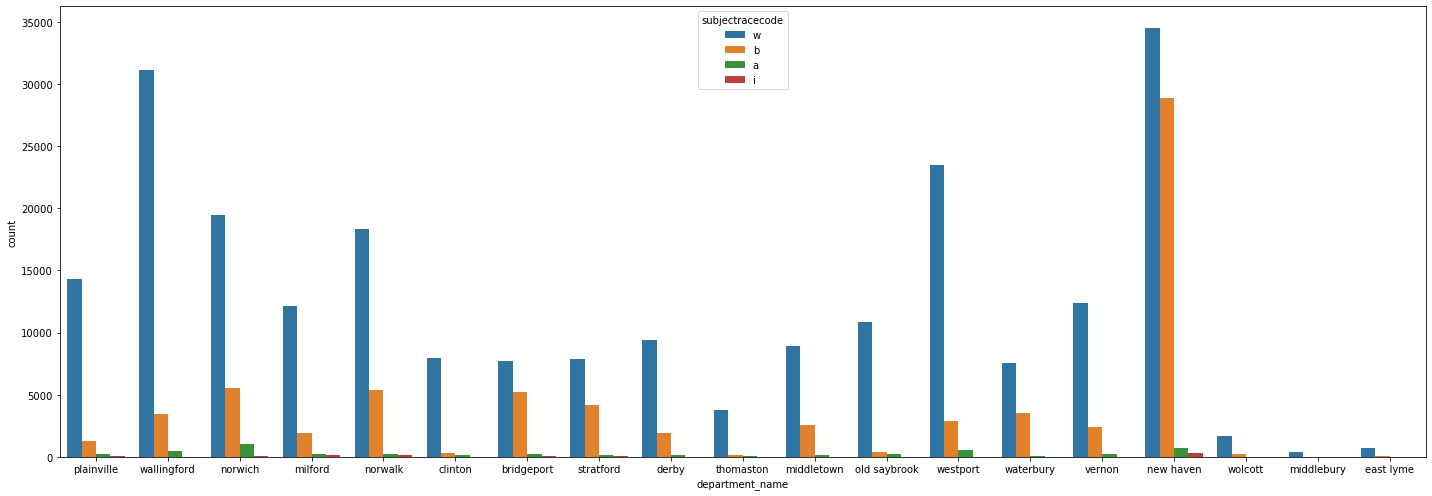

In [165]:
plt.figure(figsize=(20,7))
sns.countplot(data=data_pre_processed[data_pre_processed['department_name'].isin(departments_to_investigate)],
              x='department_name',hue='subjectracecode')
plt.tight_layout()

# Are there police officers worth Investigating in Particular?